<a href="https://colab.research.google.com/github/andrerubeis/My-Projects/blob/main/Academic%20Projects/Network%20Dynamics/Labs/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flows on graphs
In this lab we present the Ford Fulkerson algorithm for finding the maximum admissible flow on a capacitated network.

We then study max flow problems in multi origin-destination networks.

We then explore connections between matching in bipartite graphs and maximum flow problems.

If we have time, we will also introduce network flow optimization, and apply this framework for finding shortest paths in networks.

**Credits**: this notebook was created by Leonardo Cianfanelli and Laura Arditti. The code for Ford-Fulkerson Algorithm is based on material that can be found on Wikipedia.

## Max Flow - Min Cut Theorem and the Ford Fulkerson algorithm
It is given a graph $G = (V, E)$ which represents a flow network, and two vertices source ‘s’ and sink ‘t’ in it. Every edge $(u,v)$ has a capacity $c(u,v)$. We want to find the maximum possible flow from s to t with the following constraints:

1. Flow on an edge doesn’t exceed the given capacity of the edge.
2. Incoming flow is equal to outgoing flow for every vertex except s and t.

The desired flow $f$ is constructed iteratively starting from a zero-flow vector: at each round of the algorithm $f$ is updated in such a way that the capacity and balance constraints are not violated.

To do this, at each round, given the current flow vector $f$, we define the **residual network** $G_{f}(V,E_{f})$ to be the network with capacity $c_{f}(u,v)=c(u,v)-f(u,v)$. A search on the residual graph $G_f$ is performed to find an **augmenting path** (i.e., a path on the residual network with positive capacity on every edge of the path). If an augmenting path is found, this means that the current flow $f$ on that path can be increased.

### Ford–Fulkerson Algorithm 
**Inputs**: a graph $G=(V,E)$, a vector of flow capacities $c = (c(u,v))_{(u,v) \in E}$, a source node s, and a sink node t

**Output**: a flow $f = (f(u,v))_{(u,v) \in E}$ from s to t of maximum throughput

1. $f(u,v)\leftarrow 0$ for all edges $(u,v)$
2. While there is a path p from s to t in $G_{f}$, such that $c_{f}(u,v)=c(u,v)-f(u,v)>0$ for all edges $(u,v)\in p$:
 1. Find $c_{f}(p)=\min\{c_{f}(u,v):(u,v)\in p\}$
 2. For each edge $(u,v)\in p:$
      1. $f(u,v)\leftarrow f(u,v)+c_{f}(p)$ (Increase the flow along the path)
      2. $f(v,u)\leftarrow f(v,u)-c_{f}(p)$ (Impose the symmetry of the flow)

Ford-Fulkerson Algorithm is called a "method", instead of "algorithm", because it does not specify univocally how to select paths. The path in step 2 can be found, for example, with a breadth-first search (BFS) or a depth-first search in $G_{f}(V,E_{f})$. If you use the former, the algorithm is called Edmonds–Karp.

## Example: iterative Ford-Fulkerson by hand

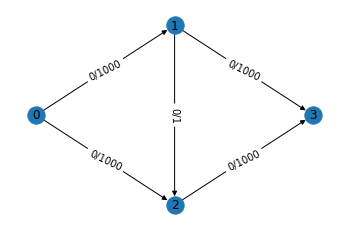

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.DiGraph()
G.add_edges_from([(0,1),(0,2),(1,2),(1,3),(2,3)])

pos = {0: (40, 20), 1: (60, 35), 2: (60, 5), 3: (80, 20)}

labels = ['0/1000','0/1000','0/1','0/1000','0/1000']

zip_operator = zip(G.edges(), labels)
labels = dict(zip_operator)

nx.draw_networkx_edge_labels(G,pos,edge_labels = labels)

nx.draw(G, pos, with_labels = True)

We aim at finding the maximal flow from 0 to 3.

The edge labels show the flow running along the edges and the capacity of the edges.

We start with flow 0 on every path. 

0-1-2-3, 0-1-3 and 0-2-3 are augmenting paths

We arbitrarly choose to add flow on 0-1-2-3.

The capacity of 0-1-2-3 is the minimal capacity of the edges in the path, which is 1.

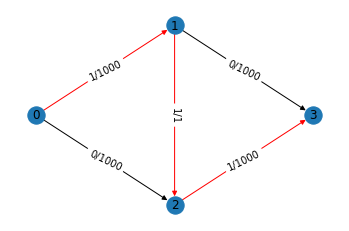

In [2]:
labels = ['1/1000','0/1000','1/1','0/1000','1/1000']

colors = ['red','black','red','black','red']

zip_operator = zip(G.edges(), labels)
labels = dict(zip_operator)

nx.draw_networkx_edge_labels(G,pos,edge_labels = labels)

nx.draw(G, pos, with_labels = True, edge_color = colors)

We update flows:
- $f(0,1) = 1$
- $f(1,0) = -1$ (symmetry)
- $f(0,2) = 0$
- $f(2,0) = 0$ (symmetry)
- $f(1,2) = 1$
- $f(2,1) = -1$ (symmetry),

and so on, and capacities $c_f(i,j) = c(i,j) - f(i,j)$:
- $c_f(0,1) = 1000-1 = 999$
- $c_f(1,0) = 0-(-1) = 1$
- $c_f(0,2) = 1000-0 = 1000$
- $c_f(2,0) = 0-0 = 0$
- $c_f(1,2) = 1-1 = 0$
- $c_f(2,1) = 0-(-1) = 1$.

Note that edges $(1,0)$ and $(2,1)$, which are not in the original network, have now positive residual capacity, meaning that we can allocate some flow on them. Intuitively speaking, by symmetry constraint, allocating some flow on $(2,1)$ means removing flow from $(1,2)$.

We now proceed to iteratively updating flows. There are three augmenting paths: 0-1-3, 0-2-3, 0-2-1-3.

We arbitrarly choose to allocate flow on the path 0-2-1-3.

The maximum flow that can be allocated is 1, because of the residual capacity constraint of edge $(2,1)$.

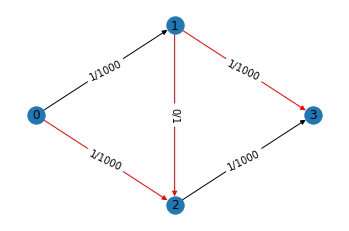

In [3]:
labels = ['1/1000','1/1000','0/1','1/1000','1/1000']

colors = ['black','red','red','red','black']

zip_operator = zip(G.edges(), labels)
labels = dict(zip_operator)

nx.draw_networkx_edge_labels(G,pos,edge_labels = labels)

nx.draw(G, pos, with_labels = True, edge_color = colors)

After 1998 steps more...

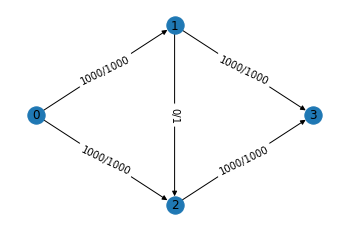

In [4]:
labels = ['1000/1000','1000/1000','0/1','1000/1000','1000/1000']

zip_operator = zip(G.edges(), labels)
labels = dict(zip_operator)

nx.draw_networkx_edge_labels(G,pos,edge_labels = labels)

nx.draw(G, pos, with_labels = True)

There are no longer augmenting paths with residual capacity in the network.

Thus, the resulting flows correspond to the maximal flow that can be send from 0 to 3.

The maximal throughput that can be send from 0 to 3 is 2000. We can verify this by using NetworkX methods.

In [5]:
# assign feature 'capacity' to every edge, and use networkX method for maximum flow

G[0][1]['capacity'] = 1000
G[0][2]['capacity'] = 1000
G[1][2]['capacity'] = 1
G[1][3]['capacity'] = 1000
G[2][3]['capacity'] = 1000

nx.algorithms.flow.maximum_flow(G,0,3)

(2000, {0: {1: 1000, 2: 1000}, 1: {2: 0, 3: 1000}, 2: {3: 1000}, 3: {}})

As you have seen, the convergence of the Ford-Fulkerson algorithm may be slow. This depends crucially on the sequence of augmenting paths that we choose. However, the algorithm is guaranteed to converge in finite steps if the capacities are rational numbers.

We draw the initial graph.

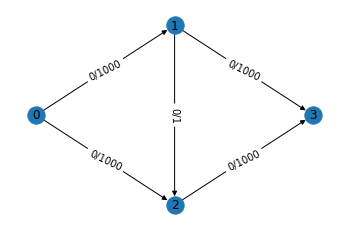

In [6]:
G = nx.DiGraph()
G.add_edges_from([(0,1),(0,2),(1,2),(1,3),(2,3)])

pos = {0: (40, 20), 1: (60, 35), 2: (60, 5), 3: (80, 20)}

labels = ['0/1000','0/1000','0/1','0/1000','0/1000']

zip_operator = zip(G.edges(), labels)
labels = dict(zip_operator)

nx.draw_networkx_edge_labels(G,pos,edge_labels = labels)

nx.draw(G, pos, with_labels = True)

Let us use another sequence of augmenting paths.

We start allocating flow on the path 0-1-3, with residual capacity equal to 1000.

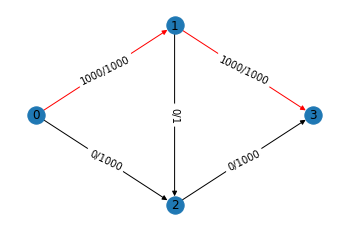

In [7]:
labels = ['1000/1000','0/1000','0/1','1000/1000','0/1000']

colors = ['red','black','black','red','black']

zip_operator = zip(G.edges(), labels)
labels = dict(zip_operator)

nx.draw_networkx_edge_labels(G,pos,edge_labels = labels)

nx.draw(G, pos, with_labels = True, edge_color = colors)

There is now only an augmenting path, which is 0-2-3, with residual capacity equal to 1000

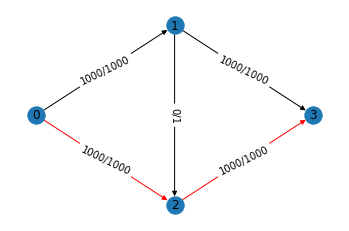

In [8]:
labels = ['1000/1000','1000/1000','0/1','1000/1000','1000/1000']

colors = ['black','red','black','black','red']

zip_operator = zip(G.edges(), labels)
labels = dict(zip_operator)

nx.draw_networkx_edge_labels(G,pos,edge_labels = labels)

nx.draw(G, pos, with_labels = True, edge_color = colors)

There are not augmenting paths in the network, thus we have found the maximal flow in only 2 steps.

### Edmonds-Karp Algorithm
The Edmonds–Karp algorithm is an implementation of Ford–Fulkerson algorithm, where the search order when finding the augmenting path is defined. A shortest path that has available capacity is found by a breadth-first search.

In [9]:
import collections

# This class represents a directed graph using adjacency matrix representation
class Graph:
    # __init__ is a reseved method in python classes.
    # In object oriented terminology, it is the constructor of the class.
    # We define a new class 'graph' instead of using the NetworkX package.
    def __init__(self, graph): 
        # the Graph object represents the flow network and the graph
        # attribute will be updated by the Edmonds-Karp Algorithm to 
        # represent the residual graph.
        # Entry [u][v] of graph array stores the capacity of link (u,v).
        self.graph = graph  
        # Number of nodes:
        self.ROW = len(graph)

    def bfs(self, s, t, parent):
        """Returns true if there is a path from source 's' to sink 't' in the
        residual graph. Also fills parent[] to store the path """
        # Mark all the vertices as not visited
        visited = [False] * (self.ROW)

        # Create a double-ended queue for BFS
        queue = collections.deque()

        # Mark the source node as visited and enqueue it
        # When visited, nodes are appended "to the right end" of the queue.
        queue.append(s)
        visited[s] = True

        # Standard BFS loop
        while queue: # while there are still elements in the queue
            # Nodes are extracted from "the left end" of the queue
            u = queue.popleft()

            # Get all adjacent vertices of the dequeued vertex u
            # If an adjacent vertex has not been visited, then mark 
            # it as visited and enqueue it.
            
            # Enumerate() method adds a counter to an iterable
            # to keep a count of iterations. We cycle over row
            # u of graph array: ind is the index of the node,
            # val is >0 if node ind is adjacent to u, i.e. if 
            # there is residual capacity on the link (u,ind),
            # it is 0 otherwise.
            for ind, val in enumerate(self.graph[u]): 
                if (visited[ind] == False) and (val > 0):
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        # If sink is reached by BFS starting from source, then return
        # true, else return false
        return visited[t]

    # Returns the maximum flow from s to t in the given graph
    def edmonds_karp(self, source, sink):
        # parent array is filled by bfs() and it is used 
        # to compute augmenting paths.
        # It is initialized with the sentinel value -1
        parent = [-1] * (self.ROW)

        # Both max flow value and max flow vector are 
        # initialized to 0
        max_flow = 0  
        # initialize matrix of zeros with size ROW x ROW
        flow = np.array([[0] * (self.ROW)] * (self.ROW))

        # Augment the flow while there is a path from source to sink
        # in the residual graph
        while self.bfs(source, sink, parent): # the algorithm stops when there are augmenting paths from s to t
            # now parent stores the augmenting path found by bfs

            # Find the minimum residual capacity of the edges along the
            # origin-destination path found by BFS.
            res_capacity = float("Inf")
            # start from the endpoint of the path
            n = sink
            # travel the path backwards until you reach the source
            # and update the minimal residual capacity of links
            while n != source:
                res_capacity = min(res_capacity, self.graph[parent[n]][n])
                n = parent[n] 

            # Add the residual capacity to the maximal throughput
            max_flow += res_capacity

            # Update the flow vector by adding the residual capacity
            # of the augmenting path to each edge in the path (to preserve
            # symmetry, subtract it to each reverse edge).
            # Compute the new residual network by updating
            # the residual capacities of the edges and reverse edges
            # along the augmenting path.
            v = sink
            while v != source:
                u = parent[v]
                flow[u][v] += res_capacity
                flow[v][u] -= res_capacity
                self.graph[u][v] -= res_capacity
                self.graph[v][u] += res_capacity
                v = parent[v]  
            
        return max_flow, flow

Networkx implements the Edmonds-Karp algorithm. 

The `networkx.algorithms.flow.edmonds_karp` function returns the residual network resulting after computing the maximum flow.

Networkx also provides the functions `networkx.algorithms.flow.maximum_flow` and `networkx.algorithms.flow.minimum_cut` which compute the maximun throughput and  the value and the node partition of a minimum cut, respectively.

### Exercise
1. Construct the graph of the example above, and assume the link capacities defined therin.
2. Apply the above implementation of the Edmonds-Karp algorithm to find the maximum throughput between the origin and destination nodes.
3. Compare the result to the flow found with `maximum_flow` and check that it is equal to the min-cut capacity of the graph found with `min_cut`.

In [10]:
W = np.array([[0,1000,1000,0],[0,0,1,1000],[0,0,0,1000],[0,0,0,0]])
G = Graph(W)

max_flow, flow = Graph.edmonds_karp(G,0,3)

print("The maximum flow:", max_flow, "\n")
print("The flow distribution: \n", flow)

The maximum flow: 2000 

The flow distribution: 
 [[    0  1000  1000     0]
 [-1000     0     0  1000]
 [-1000     0     0  1000]
 [    0 -1000 -1000     0]]


Let us explore the steps of the algorithm by adding some "print" in the code.

In [11]:
class Graph_print:
    # __init__ is a reseved method in python classes.
    # In object oriented terminology, it is the constructor of the class.
    # We define a new class 'graph' instead of using the NetworkX package.
    def __init__(self, graph): 
        # the Graph object represents the flow network and the graph
        # attribute will be updated by the Edmonds-Karp Algorithm to 
        # represent the residual graph.
        # Entry [u][v] of graph array stores the capacity of link (u,v).
        self.graph = graph  
        # Number of nodes:
        self.ROW = len(graph)

    def bfs(self, s, t, parent):
        """Returns true if there is a path from source 's' to sink 't' in the
        residual graph. Also fills parent[] to store the path """
        # Mark all the vertices as not visited
        visited = [False] * (self.ROW)

        # Create a double-ended queue for BFS
        queue = collections.deque()

        # Mark the source node as visited and enqueue it
        # When visited, nodes are appended "to the right end" of the queue.
        queue.append(s)
        visited[s] = True

        # Standard BFS loop
        while queue: # while there are still elements in the queue
            # Nodes are extracted from "the left end" of the queue
            print("Queue:", queue, "\n")
            u = queue.popleft()
            print("Extracted node:", u, "\n")

            # Get all adjacent vertices of the dequeued vertex u
            # If an adjacent vertex has not been visited, then mark 
            # it as visited and enqueue it.
            
            # Enumerate() method adds a counter to an iterable
            # to keep a count of iterations. We cycle over row
            # u of graph array: ind is the index of the node,
            # val is >0 if node ind is adjacent to u, i.e. if 
            # there is residual capacity on the link (u,ind),
            # it is 0 otherwise.
            for ind, val in enumerate(self.graph[u]): 
                if (visited[ind] == False) and (val > 0):
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
            
            print("Parents", parent, "\n")
            print("Visited", visited, "\n \n \n")

        # If sink is reached by BFS starting from source, then return
        # true, else return false
        return visited[t]

    # Returns the maximum flow from s to t in the given graph
    def edmonds_karp(self, source, sink):
        n_iter = 1
        print("iteration of bfs number:", n_iter, "\n")
        # parent array is filled by bfs() and it is used 
        # to compute augmenting paths.
        # It is initialized with the sentinel value -1
        parent = [-1] * (self.ROW)

        # Both max flow value and max flow vector are 
        # initialized to 0
        max_flow = 0  
        # initialize matrix of zeros with size ROW x ROW
        flow = np.array([[0] * (self.ROW)] * (self.ROW))

        # Augment the flow while there is a path from source to sink
        # in the residual graph
        while self.bfs(source, sink, parent): # the algorithm stops when there are augmenting paths from s to t
            # now parent stores the augmenting path found by bfs

            # Find the minimum residual capacity of the edges along the
            # origin-destination path found by BFS.
            res_capacity = float("Inf")
            # start from the endpoint of the path
            n = sink
            # travel the path backwards until you reach the source
            # and update the minimal residual capacity of links
            while n != source:
                res_capacity = min(res_capacity, self.graph[parent[n]][n])
                n = parent[n] 

            # Add the residual capacity to the maximal throughput
            max_flow += res_capacity

            # Update the flow vector by adding the residual capacity
            # of the augmenting path to each edge in the path (to preserve
            # symmetry, subtract it to each reverse edge).
            # Compute the new residual network by updating
            # the residual capacities of the edges and reverse edges
            # along the augmenting path.
            v = sink
            while v != source:
                u = parent[v]
                flow[u][v] += res_capacity
                flow[v][u] -= res_capacity
                self.graph[u][v] -= res_capacity
                self.graph[v][u] += res_capacity
                v = parent[v]  
            n_iter += 1
            print("iteration of bfs number:", n_iter, "\n")
            
        return max_flow, flow

In [12]:
W = np.array([[0,1000,1000,0],[0,0,1,1000],[0,0,0,1000],[0,0,0,0]])
G = Graph_print(W)

max_flow, flow = Graph_print.edmonds_karp(G,0,3)

iteration of bfs number: 1 

Queue: deque([0]) 

Extracted node: 0 

Parents [-1, 0, 0, -1] 

Visited [True, True, True, False] 
 
 

Queue: deque([1, 2]) 

Extracted node: 1 

Parents [-1, 0, 0, 1] 

Visited [True, True, True, True] 
 
 

Queue: deque([2, 3]) 

Extracted node: 2 

Parents [-1, 0, 0, 1] 

Visited [True, True, True, True] 
 
 

Queue: deque([3]) 

Extracted node: 3 

Parents [-1, 0, 0, 1] 

Visited [True, True, True, True] 
 
 

iteration of bfs number: 2 

Queue: deque([0]) 

Extracted node: 0 

Parents [-1, 0, 0, 1] 

Visited [True, False, True, False] 
 
 

Queue: deque([2]) 

Extracted node: 2 

Parents [-1, 0, 0, 2] 

Visited [True, False, True, True] 
 
 

Queue: deque([3]) 

Extracted node: 3 

Parents [-1, 3, 0, 2] 

Visited [True, True, True, True] 
 
 

Queue: deque([1]) 

Extracted node: 1 

Parents [-1, 3, 0, 2] 

Visited [True, True, True, True] 
 
 

iteration of bfs number: 3 

Queue: deque([0]) 

Extracted node: 0 

Parents [-1, 3, 0, 2] 

Visited [True,

# Multi origin-destination maxflow

So far, we have studied maximum flow problems when there is a single origin-destination pair. 

For some applications, it is useful to find maximum flow with multiple origin-destinations.

The multi o-d maxflow problem may be rephrased in terms of single o-d maxflow problem, and then handled with the instruments introduced above. Let us see this by an example.

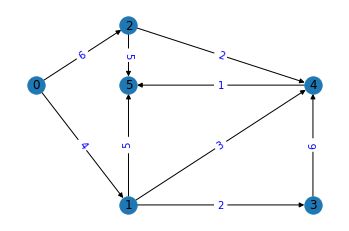

In [13]:
G = nx.DiGraph()
G.add_edges_from([(0,2),(0,1),(2,4),(1,3),(2,5),(3,4),(4,5),(1,4),(1,5)])

pos = {0: [0,2], 1: [1,0], 2: [1,3], 3: [3,0], 4: [3,2], 5:[1,2] }

nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'4',
(0,2):'6',(2,4):'2',(2,5):'5',
(3,4):'6', (4,5):'1', (1,3):'2', (1,4):'3', (1,5): ' 5'},font_color='blue')

nx.draw(G, pos, with_labels = True)

Consider sources $\{0,1\}$ and sinks $\{4,5\}$. To reconduct the problem to a single source and sink, an equivalent problem is to add an additional pair of nodes 'S' and 'T', and add edges from 'S' to every source of the original network, and from every sink of the original network to 'T', with infinite capacity.

For simplicity, let us call 6 and 7 the new nodes.

We define the resulting network for this example.

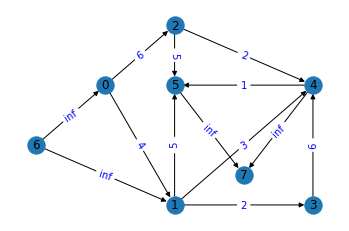

In [14]:
G1 = nx.DiGraph()
G1.add_edges_from([(0,2),(0,1),(2,4),(1,3),(2,5),(3,4),(4,5),(1,4),(1,5)])

# add additional nodes and edges
G1.add_edges_from([(6,0),(6,1),(4,7),(5,7)])

# define position for the two new nodes
pos = {0: [0,2], 1: [1,0], 2: [1,3], 3: [3,0], 4: [3,2], 5:[1,2], 6:[-1,1], 7:[2,0.5]}

nx.draw_networkx_edge_labels(G,pos,edge_labels={(0,1):'4',
(0,2):'6',(2,4):'2',(2,5):'5',
(3,4):'6', (4,5):'1', (1,3):'2', (1,4):'3', (1,5): ' 5',
(6,0):'inf',(6,1):'inf',(4,7):'inf',(5,7):'inf'},font_color='blue')

nx.draw(G1, pos, with_labels = True)

In [15]:
# We define the capacities, and use NetworkX algorithms to compute maximum flow

G1[0][2]['capacity'] = 6
G1[0][1]['capacity'] = 4
G1[2][4]['capacity'] = 4
G1[2][5]['capacity'] = 5
G1[3][4]['capacity'] = 6
G1[4][5]['capacity'] = 1
G1[1][3]['capacity'] = 2
G1[1][4]['capacity'] = 3
G1[1][5]['capacity'] = 5
# call S = 6, and T = 7, and assign infinite capacity
G1[6][0]['capacity'] = float('inf')
G1[6][1]['capacity'] = float('inf')
G1[4][7]['capacity'] = float('inf')
G1[5][7]['capacity'] = float('inf')

nx.algorithms.flow.maximum_flow(G1,6,7)

(16,
 {0: {1: 4, 2: 6},
  1: {3: 2, 4: 3, 5: 5},
  2: {4: 4, 5: 2},
  3: {4: 2},
  4: {5: 0, 7: 9},
  5: {7: 7},
  6: {0: 10, 1: 6},
  7: {}})

In [16]:
# compute also the minimum cut
nx.algorithms.flow.minimum_cut(G1,6,7)

(16, ({0, 1, 6}, {2, 3, 4, 5, 7}))

As expected, the minimum cut equals the maximal flow.

# Application of multi o-d maxflow problems: perfect matching

**Definition**: given a graph $G=(V,E)$, a matching is a subset of edges $M \subseteq E$ such that no two edges in $M$ share a common node (head or tail).

**Definition**: Consider a simple bipartite graph, whereby the node set can be partitioned as $V = V_0 \cup V_1$, with $V_0 \cap V_1 = \emptyset$, and no edges between $V_0$ and $V_1$ exist. For $h = 0,1$, we shall refer to a matching $M$ in $G$ as $V_h$-perfect (or $V_h$-saturating) if every node in $V_h$ is matched in $M$.

### Example

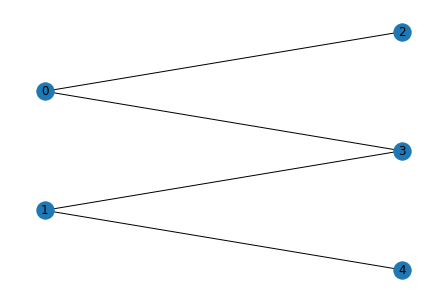

In [17]:
G = nx.Graph()
G.add_edges_from([(0,2),(0,3),(1,3),(1,4)])

pos = {0:[0,2], 1:[0,0], 2:[2,3], 3:[2,1], 4:[2,-1]}

nx.draw(G, pos, with_labels=True)

We immediately observe that the graph is bipartite, with $V_0 = \{0,1\}, V_1 = \{2,3,4\}$.

We now show a $V_0$-perfect matching, i.e., a matching that matches every node in $V_0$

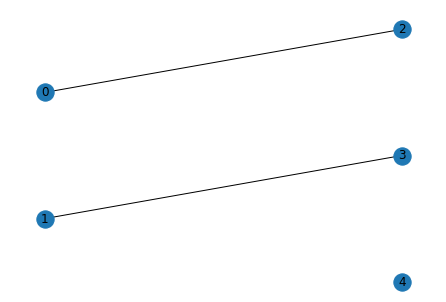

In [18]:
G = nx.Graph()
G.add_edges_from([(0,2),(1,3)])
G.add_node(4)

pos = {0:[0,2], 1:[0,0], 2:[2,3], 3:[2,1], 4:[2,-1]}

nx.draw(G, pos, with_labels=True)

**Question**: can you find a $V_1$ perfect matching?

**Hall's marriage Theorem**: for a simple bipartite graph $G = (V,E)$ and $V_0 \subseteq V$, there exists a $V_0$-perfect matching in $G$ if and only if

$$
|\mathcal{U}| \le |\mathcal{N}_{\mathcal{U}}| \quad \forall \mathcal{U} \subseteq V_0,
$$

where
$$
\mathcal{N}_{\mathcal{U}} = \sum_{i \in \mathcal{U}} \mathcal{N}_i
$$
is the neighborhood of $\mathcal{U}$ in $G$.

In other words, for every subset $U$ of $V_0$, we require that $U$ possesses a number of neighboring nodes which is at least the number of nodes in $U$. The necessity of such condition is trivial to verify, for the sufficiency we refer to the lecture notes.

We here focus on the algorithmic viewpoint of matching problems and on applications.

**Application, example**: assume there are 5 people and 5 books, and each person expresses interest in some of the books. Is there a way to assign to every person a book of interest?

We can represent this situation by a simple bipartite network, where $V_0$ is the set of people and $V_1$ and the set of books, and an edge $(n_0,n_1)$ (with $n_0 \in V_0$, $n_1 \in V_1$) exists if the person $n_0$ is interested in the book $n_1$. 

The question may be rephrased in: "does a $V_0$-perfect matching exist?" 

If there are less books than people, i.e., if $|V_1|<|V_0|$, a $V_0$-perfect matching cannot exist. This follows immediately from Hall's theorem by taking $\mathcal{U}=V_0$, and observing that $N_{\mathcal{U}} \subseteq V_1$.

**Remark**: Note that a perfect matching (both for $V_0$ and $V_1$) can exist only if $|V_0|=|V_1|$.

We consider a simple bipartite network, and try a naive algorithm to answer the question.

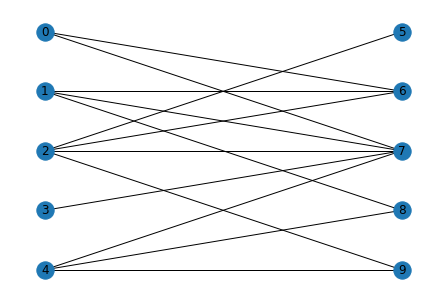

In [19]:
G = nx.Graph()
G.add_edges_from([(0,6),(0,7),(1,6),(1,7),(1,8),(2,5),(2,6),(2,7),(2,9),(3,7),(4,7),(4,8),(4,9)])

pos = {0:[0,2], 1:[0,1], 2:[0,0], 3:[0,-1], 4:[0,-2], 5:[1,2], 6:[1,1], 7:[1,0], 8:[1,-1], 9:[1,-2]}

nx.draw(G,pos, with_labels=True)

We let the left nodes to be people, and the right nodes to be books. You can verify that the graph is bipartite.

We try this greedy algorithm: for every person (from above to below) we assign the first book (from above to below) of interest.

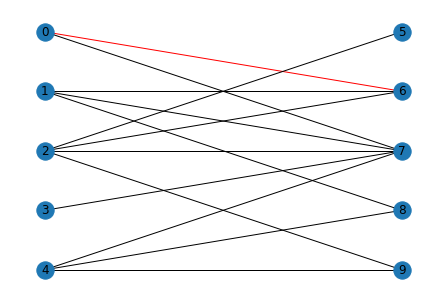

In [20]:
# Assign book 6 to person 0
for u,v in G.edges():
    G[u][v]['color'] = 'black'
    
G[0][6]['color'] = 'red'

colors = [G[u][v]['color'] for u,v in G.edges()]

nx.draw(G, pos, with_labels = True, edge_color = colors)

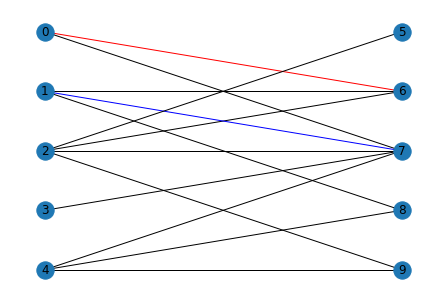

In [21]:
# Book 6 is not available for person 1, thus assign book 7
G[1][7]['color'] = 'blue'

colors = [G[u][v]['color'] for u,v in G.edges()]

nx.draw(G, pos, with_labels = True, edge_color = colors)

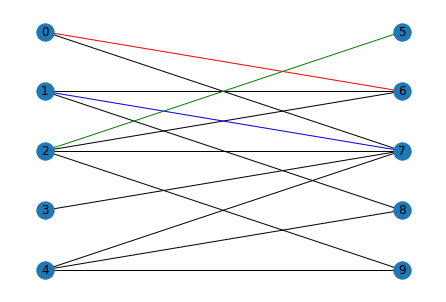

In [22]:
# Assign book 5 to person 2
G[2][5]['color'] = 'green'

colors = [G[u][v]['color'] for u,v in G.edges()]

nx.draw(G, pos, with_labels = True, edge_color = colors)

Node 3 is not matched! The greedy algorithm fails in finding a perfect matching. 

However, this does not mean that a perfect matching does not exist. To verify that a perfect matching exists, one could verify the sufficient and necessary condition in Hall's marriage theorem. 

We instead show an analogy between maximal flows and perfect matching, and exploit such an analogy to find perfect matching by Ford-Fulkerson theorem.

Given a simple bipartite graph $G=(V,E)$, consider the directed capacitated graph $G1$, with node set $V \cup s \cup t$, and edge set constructed as follows:
- for every node $n \in V_0$, add an edge (s,n), with capacity 1;
- for every node $n \in V_1$, add an edge (n,t), with capacity 1;
- for every undirected edge $(i,j)$ in $G$, add a directed edge $(i,j)$ in $G1$ with capacity 1.

Let us construct $G1$.

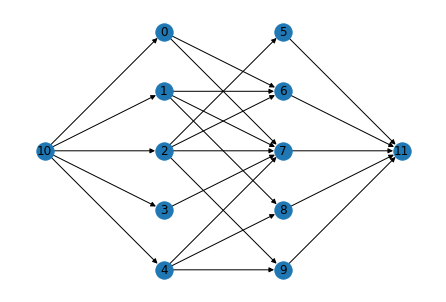

In [23]:
G1 = nx.DiGraph()
G1.add_edges_from([(0,6),(0,7),(1,6),(1,7),(1,8),(2,5),(2,6),(2,7),(2,9),(3,7),(4,7),(4,8),(4,9)])
G1.add_edges_from([(10,0),(10,1),(10,2),(10,3),(10,4),(5,11),(6,11),(7,11),(8,11),(9,11)])

pos = {0:[0,2], 1:[0,1], 2:[0,0], 3:[0,-1], 4:[0,-2], 5:[1,2], 6:[1,1], 7:[1,0], 8:[1,-1], 9:[1,-2], 10:[-1,0], 11:[2,0]}

nx.draw(G1,pos,with_labels=True)

There is an analogy between perfect matchings and maximal flow on this auxiliary network $G1$. In particular, a $V_0$-perfect matching on $G$ exists if and only if it there exists a flow with throughput $|V_0|$ on the network $G1$. We can now exploit Ford-Fulkerson algorithm to find the maximum flow that can be sent in $G1$.

**Remark**: the analogy can be proved by using the fact that, if the capacities of the edges are integers, then the maximum flow has integer components (see the lecture notes). Because of the network structure, if a maximum flow with throughput $|V_0|$ exists, then every node in $V_0$ has incoming and outcoming flow $1$, since all the edges have unitary capacity. Moreover, given a node $i \in |V_0|$, if a $|V_0|$-perfect matching exists, then there exists $k \in V_1$ such that

$$
f_{(i,j)} = 
\begin{cases}
1 \quad \text{if} \ j = k \\
0 \quad \text{otherwise}
\end{cases}
$$

Thus, given a maximum flow with throughput $|V_0|$, the associated $V_0$-perfect matching can be found by selecting all the edges $(i,j)$ ($i \in V_0, j \in V_1$) such that $f_{(i,j)}=1$.

**Exercise**: find the maximum flow on $G1$, and deduce the perfect matching on $G$.

The analogy can be pushed further by finding perfect matching in weighted graphs. With respect to our example, this would mean to allow multiple copies of the books, and to allow people to take more than one book.

In the last part of the lecture, we focus on network flow optimization

## Network Flow optimization
For this exercise, we will use CVXPY which is a Python-embedded modeling language for convex optimization problems. It allows to express problems in a natural way that follows the math, rather than in the restrictive standard form required by solvers.

If CVXPY is not already in your environment, you can install it following the instructions reported [here](https://www.cvxpy.org/install/index.html). (for Anaconda in Windows run in your notebook the command **conda install -c conda-forge cvxpy**)

Separable convex network flow optimization arises in several applications, e.g., shortest paths between origin and destination, system optimum traffic flows, user optimum network flows in homogeneous routing games, electrical current flows in resistor networks.

Given a multigraph $(V,E)$, an **exogenous network flow** is a vector ${\nu} \in \mathrm{R}^V$ such that

\begin{equation}
	\sum_{i \in V} \nu_i = 0.
\end{equation}

A network flow is a vector $f \in \mathrm{R}^E$ satisfying a positivity constraint and a mass conservation constraints, i.e.,

\begin{equation}
 f \ge \mathbf{0}, \quad Bf = \nu.
\end{equation}

Every edge is endowed with a separable non-decreasing convex cost function $\psi_e(f_e)$ such that $\psi_e(0)=0$. 

Given an exogenous flow $\nu$ and a network with node-edge matrix $B$, we study the following optimization problem:

\begin{equation}
\begin{aligned}
	f^* \in \ & \underset{\substack{f \in \mathrm{R}^{E}_+ \\ B f = \nu}}{\arg\min}
	& & \sum_{e \in E} \psi_e (f_e).
\end{aligned}
\end{equation}

The ratio $\psi_e(f_e) / f_e$ may be interpreted as the cost per unit of flow sent along the edge $e$. The convexity of $\psi_e(f_e)$ is thus equivalent to requiring that the marginal cost for sending some flow on each edge is non-decreasing in the flow itself.

This class of problems may be applied for shortest paths algorithms in a two-terminal network with origin and destination $(o,d)$. For instance:
- if $\psi_e(f_e) = f_e$, the cost for a unit of flow is 1, which means that all the edges has same length, and the cost paid for sending flow along an edge is simply proportional to the flow $f_e$ itself;
- if $\psi_e(f_e) = l_e f_e$, each edge is endowed with a length $l_e$ which differs from edge to edge. Even in this formulation, the cost for sending a unit of flow on the edge $e$ does not depend on $f_e$, which means that we are not taking into account congestion effects. Congestion effects appear when considering strictly convex cost functions.

### Example 

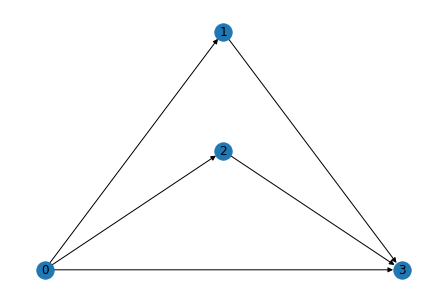

In [24]:
G = nx.DiGraph()

G.add_nodes_from([])

G.add_edges_from([(0,1),(0,2),(0,3),(1,3),(2,3)])

pos = {0:[0,0], 1:[1,2], 2:[1,1], 3:[2,0]}

nx.draw(G, pos, with_labels=True)

We now use network flow optimization to find the shortest path from 0 to 2.

Since the problem is linear, the solution will be to allocate the flow on a convex combination of the optimal paths.

In [25]:
import cvxpy as cp

# Problem data.

# incidence_matrix(G, oriented=True).toarray() returns  
# the incidence matrix of G as a numpy array. 
# In the matrix returned by incidence_matrix 
# a -1 appears for the source (tail) of an edge 
# and +1 for the destination (head) of the edge.
# This sign convention is opposite to the one we adopt
# for the node-link incidence matrix, so we 
# add a minus sign in front.
B = - nx.linalg.graphmatrix.incidence_matrix(G, oriented=True).toarray() 
n_edges = len(G.edges)
# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
# the solution of the shortest path problem is actually independent on the throughput value because of the linearity
tau = 1
nu = np.array([1, 0, 0, -1]) * tau
# l stores the coefficients of the linear terms of the objective function.
# In this case, the objective function is
l = np.array([1,1,3,1,1]) # 1d array

# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(l.T @ f)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for f is stored in `f.value`.
print("Optimal f:", f.value)

Optimal f: [4.99999998e-01 4.99999998e-01 3.85901718e-09 4.99999998e-01
 4.99999998e-01]


The following characterization may be used to individuate the shortest paths: if the flow on a path $p$ is positive (i.e., if the flow on all the edges that compose the path is positive), then $p$ is a shortest path.

**Exercise**: Compute the diameter of the Karate club network by using convex optimization, and compare the result with more standard methods, e.g., by using the networkX function to compute the diameter.

In [26]:
# TO DO